# Import required libraries

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Data Loading and Initial Exploration

In [362]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())

print("\nBasic Statistics:")
display(df.describe().round(2))

print("\nMissing Values:")
display(df.isnull().sum())
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Total duplicates: {df.duplicated().sum().sum()}")

print("\nColumn Names:")
print(df.columns.tolist())


Dataset Shape: (1025, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None


Basic Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00



Missing Values:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values: 0
Total duplicates: 723

Column Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


# 2. ETL Process (Extract, Transform, Load)

In [363]:
# ETL: Clean and transform data before loading into analysis
def perform_etl(data):
    """
    Perform ETL process: Extract, Transform, Load
    Clean and transform data before loading into analysis
    """
    print("=== ETL PROCESS ===")
    
    # Create a copy for ETL
    etl_data = data.copy()
    
    # Step 1: Data Quality Checks
    print("1. Data Quality Checks:")
    print(f"   Initial shape: {etl_data.shape}")
    print(f"   Missing values: {etl_data.isnull().sum().sum()}")
    
    # Handle missing values if any
    if etl_data.isnull().sum().sum() > 0:
        # For numerical columns, fill with median
        numerical_cols = etl_data.select_dtypes(include=[np.number]).columns
        etl_data[numerical_cols] = etl_data[numerical_cols].fillna(etl_data[numerical_cols].median())
        
        # For categorical columns, fill with mode
        categorical_cols = etl_data.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            etl_data[col] = etl_data[col].fillna(etl_data[col].mode()[0])
    
    # Step 2: Data Type Validation and Conversion
    print("2. Data Type Validation and Conversion:")
    print(f"   Data type is correct")

    # Check and convert data types if needed
    for col in etl_data.columns:
        if etl_data[col].dtype == 'object':
            # Try to convert to numeric if possible
            try:
                etl_data[col] = pd.to_numeric(etl_data[col])
                print(f"Converted {col} to numeric")
            except:
                print(f"{col} remains as categorical")

    # Step 3: Remove duplicates
    initial_rows = len(etl_data)
    etl_data = etl_data.drop_duplicates()
    print(f"3. Removed {initial_rows - len(etl_data)} duplicate rows")
    
    # Step 4: Outlier detection and treatment (using IQR method)
    print("4. Outlier Treatment:")
    numerical_cols = etl_data.select_dtypes(include=[np.number]).columns
    outlier_count = 0
    
    for col in numerical_cols:
        Q1 = etl_data[col].quantile(0.25)
        Q3 = etl_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = etl_data[(etl_data[col] < lower_bound) | (etl_data[col] > upper_bound)]
        outlier_count += len(outliers)
        
        # Cap outliers
        etl_data[col] = np.where(etl_data[col] < lower_bound, lower_bound, etl_data[col])
        etl_data[col] = np.where(etl_data[col] > upper_bound, upper_bound, etl_data[col])
    
    print(f"   Treated {outlier_count} outliers across all numerical columns")
    
    # Step 5: Feature Engineering
    print("5. Feature Engineering:")
    print("   Created age groups and cholesterol categories")
    
    # Create age groups
    etl_data['age_group'] = pd.cut(etl_data['age'], bins=[0, 40, 50, 60, 100], labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])
    
    # Create cholesterol categories
    etl_data['chol_category'] = pd.cut(etl_data['chol'], bins=[0, 200, 240, 1000], labels=['Normal', 'Borderline', 'High'])
    
    print(f"\nFinal ETL dataset shape: {etl_data.shape}")

    return etl_data

# Perform ETL
etl_processed_data = perform_etl(df)
print("\nETL Process Completed Successfully!")

=== ETL PROCESS ===
1. Data Quality Checks:
   Initial shape: (1025, 14)
   Missing values: 0
2. Data Type Validation and Conversion:
   Data type is correct
3. Removed 723 duplicate rows
4. Outlier Treatment:
   Treated 91 outliers across all numerical columns
5. Feature Engineering:
   Created age groups and cholesterol categories

Final ETL dataset shape: (302, 16)

ETL Process Completed Successfully!


# 3. ELT Process (Extract, Load, Transform)

In [364]:
# ELT: Load raw data first, then transform within the sandbox
def perform_elt(data):
    """
    Perform ELT process: Extract, Load, Transform
    Load raw data first, then transform within the sandbox
    """
    print("\n=== ELT PROCESS ===")
    
    # Create a copy for ELT (simulating raw data loading)
    elt_data = data.copy()
    print("1. Raw data loaded into sandbox")
    print(f"   Raw data shape: {elt_data.shape}")
    
    # Step 2: Transform within the sandbox
    print("2. Transforming data within sandbox:")
    
    # Create a transformation log
    transformation_log = []
    
    # Normalize numerical features
    numerical_cols = elt_data.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    
    # Store original values for reference
    for col in numerical_cols:
        elt_data[f'{col}_original'] = elt_data[col]
    
    # Apply standardization
    elt_data[numerical_cols] = scaler.fit_transform(elt_data[numerical_cols])
    transformation_log.append("Standardized all numerical features")
    
    # Create interaction features
    elt_data['age_chol_interaction'] = elt_data['age'] * elt_data['chol']
    elt_data['bp_chol_ratio'] = elt_data['trestbps'] / (elt_data['chol'] + 1)
    transformation_log.append("Created interaction features: age_chol_interaction, bp_chol_ratio")
    
    # Create categorical encodings
    categorical_features = ['cp', 'restecg', 'slope', 'thal']
    for feature in categorical_features:
        if feature in elt_data.columns:
            # One-hot encoding for low cardinality features
            if elt_data[feature].nunique() <= 5:
                dummies = pd.get_dummies(elt_data[feature], prefix=feature)
                elt_data = pd.concat([elt_data, dummies], axis=1)
                transformation_log.append(f"One-hot encoded {feature}")
    
    print("   Transformations applied:")
    for log in transformation_log:
        print(f"     - {log}")
    
    print(f"   Final ELT dataset shape: {elt_data.shape}")
    
    return elt_data, transformation_log

# Perform ELT
elt_processed_data, transformations = perform_elt(df)
print("\nELT Process Completed Successfully!")


=== ELT PROCESS ===
1. Raw data loaded into sandbox
   Raw data shape: (1025, 14)
2. Transforming data within sandbox:
   Transformations applied:
     - Standardized all numerical features
     - Created interaction features: age_chol_interaction, bp_chol_ratio
     - One-hot encoded cp
     - One-hot encoded restecg
     - One-hot encoded slope
     - One-hot encoded thal
   Final ELT dataset shape: (1025, 44)

ELT Process Completed Successfully!


# 4. ETLT Process (Extract, Transform, Load, Transform)

In [365]:
# ETLT: Apply multiple transformations before and after loading
def perform_etlt(data):
    """
    Perform ETLT process: Extract, Transform, Load, Transform
    Apply multiple transformations before and after loading
    """
    print("\n=== ETLT PROCESS ===")
    
    # Step 1: Initial Extraction and Pre-Transformation
    print("1. Initial Extraction and Pre-Transformation:")
    etlt_data = data.copy()
    
    # Data cleaning (pre-load transformation)
    initial_columns = etlt_data.columns.tolist()
    etlt_data = etlt_data.drop_duplicates()
    
    # Handle potential missing values
    numerical_cols = etlt_data.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if etlt_data[col].isnull().sum() > 0:
            etlt_data[col].fillna(etlt_data[col].median(), inplace=True)
    
    print(f"   Pre-load transformations: Removed duplicates, handled missing values")
    print(f"   Shape after pre-load transformation: {etlt_data.shape}")
    
    # Step 2: Load into analysis environment (simulated)
    print("2. Loading transformed data into analysis environment")
    
    # Step 3: Post-load transformations
    print("3. Post-load Transformations:")
    
    # Feature scaling
    scaler = StandardScaler()
    scaling_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # if not available it will be removed
    scaling_columns = [col for col in scaling_columns if col in etlt_data.columns]
    
    etlt_data[scaling_columns] = scaler.fit_transform(etlt_data[scaling_columns])
    print("   Applied standard scaling to key numerical features")
    
    # Create polynomial features
    etlt_data['age_squared'] = etlt_data['age'] ** 2
    etlt_data['chol_squared'] = etlt_data['chol'] ** 2
    print("   Created polynomial features")
    
    # Binning continuous variables
    etlt_data['age_bin'] = pd.cut(etlt_data['age'], bins=5, labels=False)
    etlt_data['chol_bin'] = pd.cut(etlt_data['chol'], bins=5, labels=False)
    print("   Created binned features for age and cholesterol")
    
    # Create clinical risk scores
    etlt_data['risk_score'] = (
        etlt_data['age'] + 
        etlt_data['trestbps'] * 0.1 + 
        etlt_data['chol'] * 0.01 - 
        etlt_data['thalach'] * 0.1
    )
    print("   Created composite risk score")
    
    print(f"   Final ETLT dataset shape: {etlt_data.shape}")
    print(f"   Total features created: {len(etlt_data.columns) - len(initial_columns)}")
    
    return etlt_data

# Perform ETLT
etlt_processed_data = perform_etlt(df)
print("\nETLT Process Completed Successfully!")


=== ETLT PROCESS ===
1. Initial Extraction and Pre-Transformation:
   Pre-load transformations: Removed duplicates, handled missing values
   Shape after pre-load transformation: (302, 14)
2. Loading transformed data into analysis environment
3. Post-load Transformations:
   Applied standard scaling to key numerical features
   Created polynomial features
   Created binned features for age and cholesterol
   Created composite risk score
   Final ETLT dataset shape: (302, 19)
   Total features created: 5

ETLT Process Completed Successfully!


# 5. Exploratory Data Analysis


=== EDA: Original Dataset ===

Target variable distribution:
target
1    526
0    499
Name: count, dtype: int64


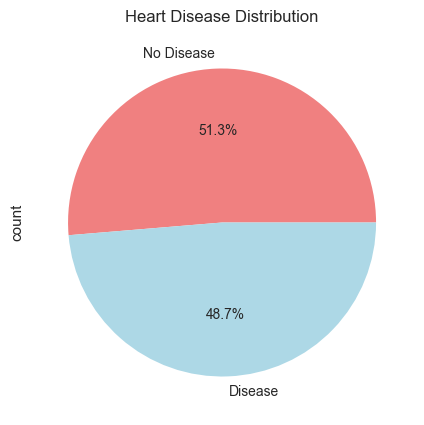

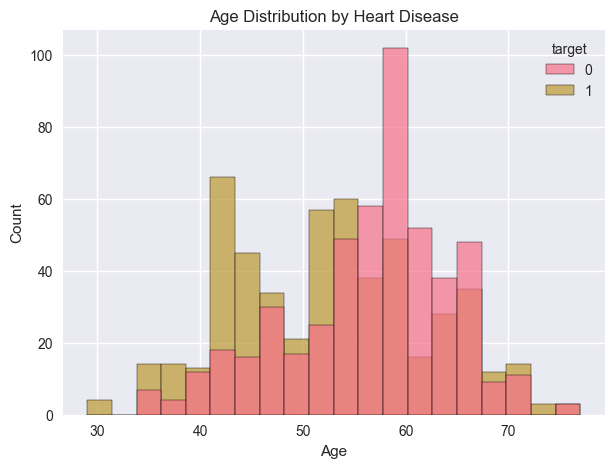

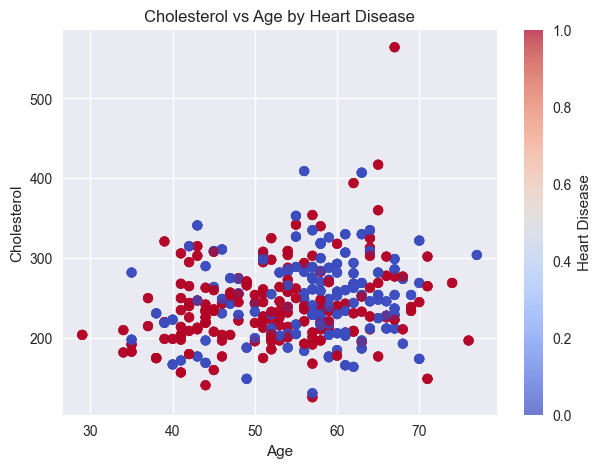

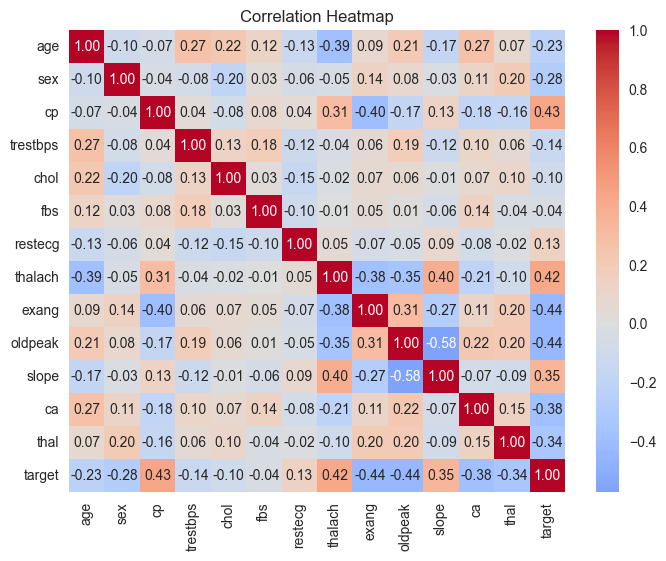

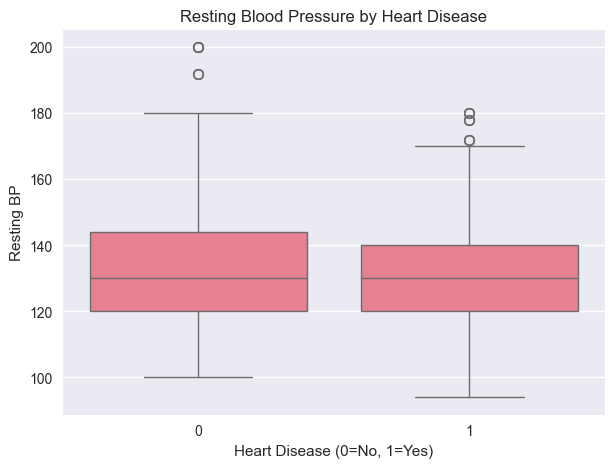

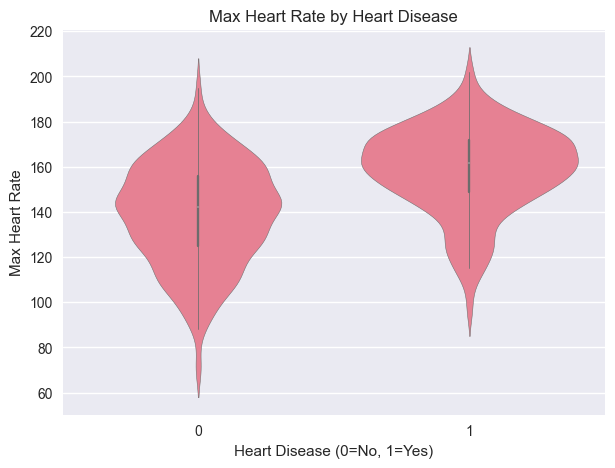


Age by target:
  Target=0: mean=56.57, std=7.91
  Target=1: mean=52.41, std=9.63

Chol by target:
  Target=0: mean=251.29, std=49.56
  Target=1: mean=240.98, std=53.01

Thalach by target:
  Target=0: mean=139.13, std=22.57
  Target=1: mean=158.59, std=19.10


In [366]:
def perform_eda(data, title="Dataset"):
    """
    Simplified Exploratory Data Analysis for Jupyter notebooks.
    """
    print(f"\n=== EDA: {title} ===")
    
    # 1. Target distribution
    print("\nTarget variable distribution:")
    print(data['target'].value_counts())
    
    # Pie chart for target
    plt.figure(figsize=(5,5))
    data['target'].value_counts().plot.pie(labels=['No Disease','Disease'], autopct='%1.1f%%',
        colors=['lightcoral','lightblue'], title='Heart Disease Distribution')
    plt.show()
    
    # 2. Age distribution by target
    plt.figure(figsize=(7,5))
    sns.histplot(data, x='age', hue='target', bins=20, alpha=0.7)
    plt.title('Age Distribution by Heart Disease')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    
    # 3. Cholesterol vs Age scatter plot
    plt.figure(figsize=(7,5))
    scatter = plt.scatter(data['age'], data['chol'], c=data['target'], cmap='coolwarm', alpha=0.7)
    plt.title('Cholesterol vs Age by Heart Disease')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.colorbar(scatter, label='Heart Disease')
    plt.show()
    
    # 4. Correlation heatmap
    numerical_data = data.select_dtypes(include=[np.number])
    corr = numerical_data.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()
    
    # 5. Blood pressure distribution by target
    plt.figure(figsize=(7,5))
    sns.boxplot(data=data, x='target', y='trestbps')
    plt.title('Resting Blood Pressure by Heart Disease')
    plt.xlabel('Heart Disease (0=No, 1=Yes)')
    plt.ylabel('Resting BP')
    plt.show()
    
    # 6. Maximum heart rate distribution by target
    plt.figure(figsize=(7,5))
    sns.violinplot(data=data, x='target', y='thalach')
    plt.title('Max Heart Rate by Heart Disease')
    plt.xlabel('Heart Disease (0=No, 1=Yes)')
    plt.ylabel('Max Heart Rate')
    plt.show()
    
    # 7. Statistical summary for selected columns
    for col in ['age', 'chol', 'thalach']:
        print(f"\n{col.capitalize()} by target:")
        for t in [0,1]:
            vals = data[data['target']==t][col]
            print(f"  Target={t}: mean={vals.mean():.2f}, std={vals.std():.2f}")

# Run EDA
perform_eda(df, "Original Dataset")


# 6. Variable Selection and Feature Importance


=== FEATURE SELECTION ANALYSIS ===


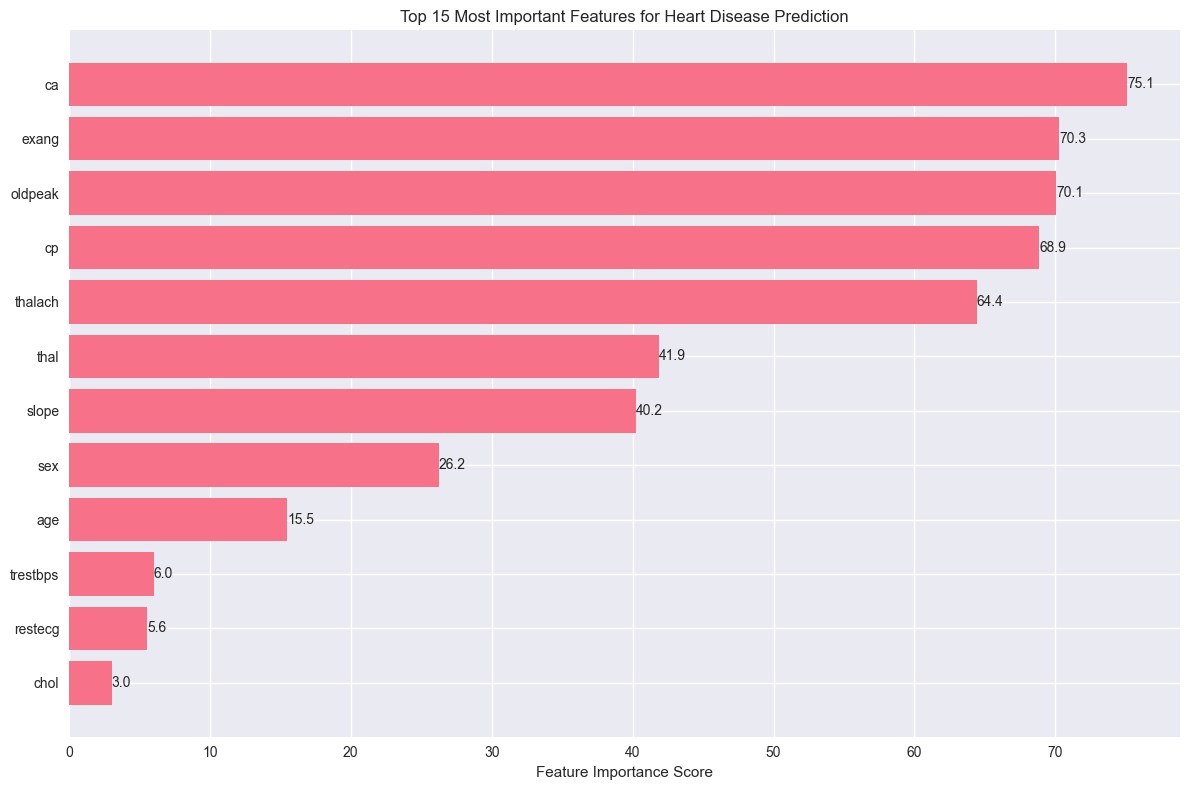


Top 10 Most Important Features:
ca                   Score:    75.09 P-value: 0.0000 ***
exang                Score:    70.26 P-value: 0.0000 ***
oldpeak              Score:    70.06 P-value: 0.0000 ***
cp                   Score:    68.86 P-value: 0.0000 ***
thalach              Score:    64.41 P-value: 0.0000 ***
thal                 Score:    41.89 P-value: 0.0000 ***
slope                Score:    40.25 P-value: 0.0000 ***
sex                  Score:    26.24 P-value: 0.0000 ***
age                  Score:    15.47 P-value: 0.0001 ***
trestbps             Score:     6.00 P-value: 0.0148 *


In [375]:
# Select key variables and propose a predictive model
def feature_selection_analysis(data):
    """
    Analyze feature importance and select key variables for modeling
    """
    print("\n=== FEATURE SELECTION ANALYSIS ===")
    
    # Prepare data for feature selection
    X = data.drop('target', axis=1)
    y = data['target']
    
    # Handle categorical variables if any
    X_encoded = X.copy()
    categorical_cols = X_encoded.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        X_encoded = pd.get_dummies(X_encoded, columns=categorical_cols, drop_first=True)
    
    # Remove any remaining non-numeric columns
    X_encoded = X_encoded.select_dtypes(include=[np.number])
    
    # Feature selection using SelectKBest
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X_encoded, y)
    
    # Create feature importance dataframe
    feature_scores = pd.DataFrame({
        'Feature': X_encoded.columns,
        'Score': selector.scores_,
        'P-value': selector.pvalues_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_scores.head(15)
    bars = plt.barh(top_features['Feature'], top_features['Score'])
    plt.xlabel('Feature Importance Score')
    plt.title('Top 15 Most Important Features for Heart Disease Prediction')
    plt.gca().invert_yaxis()
    
    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print("="*40)
    for i, row in feature_scores.head(10).iterrows():
        significance = "***" if row['P-value'] < 0.001 else "**" if row['P-value'] < 0.01 else "*" if row['P-value'] < 0.05 else ""
        print(f"{row['Feature']:20} Score: {row['Score']:8.2f} P-value: {row['P-value']:.4f} {significance}")
    
    return feature_scores, X_encoded.columns.tolist()

# Perform feature selection on original data
feature_importance, selected_features = feature_selection_analysis(etl_processed_data)


# 7. Data Splitting Strategy

In [ ]:
# Split into training, testing, and production datasets
def split_datasets(data, test_size=0.2, val_size=0.2, random_state=42):
    """
    Split data into training, testing, and production datasets
    """
    print("\n=== DATA SPLITTING STRATEGY ===")
    
    # Prepare features and target
    X = data.drop('target', axis=1)
    y = data['target']
    
    # Handle categorical variables
    X_processed = X.copy()
    categorical_cols = X_processed.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        X_processed = pd.get_dummies(X_processed, columns=categorical_cols, drop_first=True)
    
    # Ensure all columns are numeric
    X_processed = X_processed.select_dtypes(include=[np.number])
    
    # First split: separate out production data (10%)
    X_train_val, X_production, y_train_val, y_production = train_test_split(
        X_processed, y, test_size=0.1, random_state=random_state, stratify=y
    )
    
    # Second split: split remaining data into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_val, y_train_val, test_size=test_size/(1-0.1), 
        random_state=random_state, stratify=y_train_val
    )
    
    print(f"Dataset splitting summary:")
    print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(data)*100:.1f}%)")
    print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(data)*100:.1f}%)")
    print(f"Production set: {X_production.shape[0]} samples ({X_production.shape[0]/len(data)*100:.1f}%)")
    print(f"Total features: {X_train.shape[1]}")
    
    # Check target distribution in each split
    print(f"\nTarget distribution in splits:")
    print(f"Training - Disease: {y_train.sum()}/{len(y_train)} ({y_train.mean()*100:.1f}%)")
    print(f"Testing - Disease: {y_test.sum()}/{len(y_test)} ({y_test.mean()*100:.1f}%)")
    print(f"Production - Disease: {y_production.sum()}/{len(y_production)} ({y_production.mean()*100:.1f}%)")
    
    return X_train, X_test, X_production, y_train, y_test, y_production, X_processed.columns.tolist()

# Split the data
X_train, X_test, X_prod, y_train, y_test, y_prod, feature_names = split_datasets(df)